In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

%load_ext lab_black
%load_ext watermark

# Beta plots

From [Codes for Unit 4: betaplots.m](https://www2.isye.gatech.edu/isye6420/supporting.html).

Associated lecture video: [Unit 4 Lesson 7: Ten Coin Flips Revisited](https://www.youtube.com/watch?v=KYI_xX5Tqwc&list=PLv0FeK5oXK4l-RdT6DWJj0_upJOG2WKNO&index=25).

Probably faster to use scipy for these plots, but going to stick with pymc3 so I don't have to worry about looking up parameterization differences.

Also, check out https://colcarroll.github.io/updating_beta/ for a cool visualization of the beta distribution.

In [2]:
params = [
    (0.5, 0.5),
    (1, 1),
    (2, 2),
    (10, 10),
    (1, 5),
    (1, 0.4),
    (3, 5),
    (50, 30),
    (5000, 3000),
    (500, 500),
]


def beta_dist(α, β, n):
    # note: new pymc 4.0 syntax uses pm.draw() function
    # may be somewhat slower... need to check if this is the right way
    name = f"{α=}, {β=}"
    return pm.draw(pm.Beta(name, α, β), n), name


with pm.Model() as betas:
    n = 1000000
    distributions = [beta_dist(α, β, n) for α, β in params]

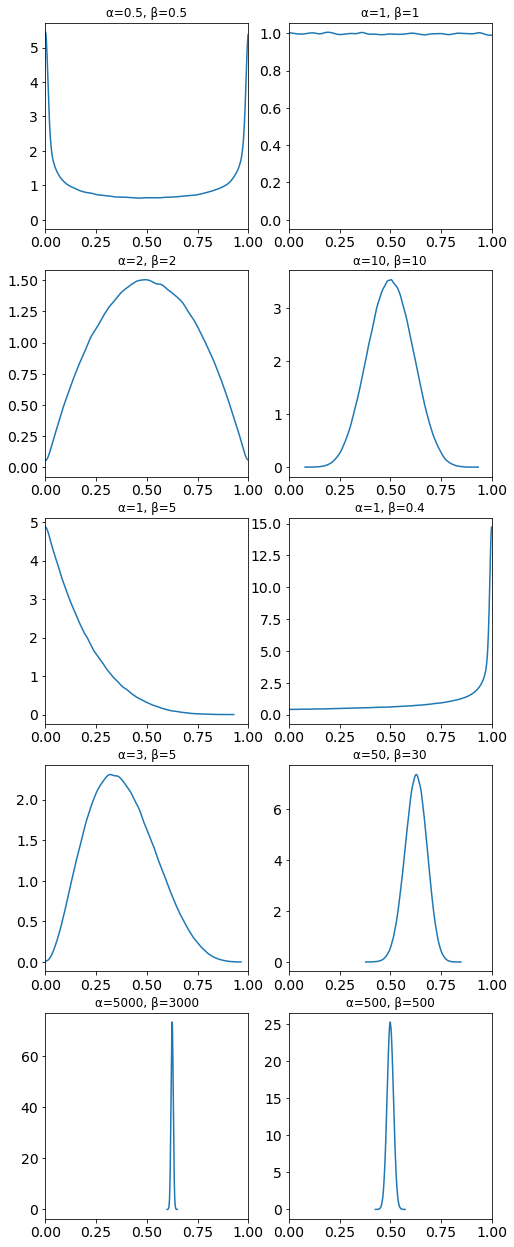

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 22), sharex="col")

for i, dist in enumerate(distributions):
    plt.subplot(5, 2, i + 1, autoscalex_on=False)
    az.plot_dist(dist[0], figsize=(2, 2))
    plt.title(dist[1])

plt.xlim(0, 1)
plt.show()

Note: you can now sample from PyMC distributions without using the context manager. See [this page](https://docs.pymc.io/en/v3/Probability_Distributions.html#using-pymc-distributions-without-a-model) in their docs.

In [4]:
%watermark --iversions -v

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

arviz     : 0.12.1
matplotlib: 3.5.2
numpy     : 1.22.4
pymc      : 4.0.0

